In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Setting pandas display all columns options to ON
pd.options.display.max_columns=999
pd.options.display.max_rows=1999

# Setting Numpy suppress scientific notation to ON
np.set_printoptions(suppress=True)

In [3]:
# REading the first segment of 39A Inbound = 767_768
colnames=['arrivaltime', 'traveltime', 'segmentid', 'dayofweek','rain','temp']
df = pd.read_csv('SegmentedSamples2_actual\\39A_segments\\767_768.csv',names=colnames)


In [4]:
df.drop('segmentid',axis=1,inplace=True)

In [5]:
df

,arrivaltime,traveltime,dayofweek,rain,temp
0,32380,91.0,Thursday,0.0,13.1
1,53523,124.0,Tuesday,0.0,8.1
2,39607,152.0,Tuesday,0.0,11.3
3,58016,98.0,Wednesday,0.0,13.8
4,39612,76.0,Tuesday,0.6,15.8
5,28163,103.0,Friday,0.0,12.4
6,70849,96.0,Friday,0.0,6.2
7,35418,89.0,Monday,0.0,8.3
8,58170,86.0,Tuesday,0.0,17.1
9,28187,124.0,Wednesday,0.0,7.1


#### Converting the dataframe to respective datatype

In [6]:
df.dtypes

arrivaltime      int64
traveltime     float64
dayofweek       object
rain           float64
temp           float64
dtype: object

In [7]:
#We need to convert only one column
df['dayofweek'] = df['dayofweek'].astype('category')

In [8]:
df.dtypes

arrivaltime       int64
traveltime      float64
dayofweek      category
rain            float64
temp            float64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
arrivaltime,5782.0,52199.174334,15901.148036,23355.0,39221.25,52181.0,64067.75,86194.0
traveltime,5782.0,110.963680,22.544731,22.0,94.00,108.0,125.00,160.5
rain,5781.0,0.092233,0.534049,0.0,0.00,0.0,0.00,17.4
temp,5782.0,9.878606,4.660570,-2.6,6.50,9.7,13.00,27.5


In [10]:
# DQR for Continuous COlumns

In [11]:
cont_description = df.select_dtypes(['int64','float64']).describe().T
miss=[]
for i,m in enumerate(df.select_dtypes(['int64','float64']).columns):
    miss.append(100-((cont_description['count'][i]/df.select_dtypes(['int64','float64']).shape[0])*100))
cont_description['% miss']=miss

In [12]:
cont_description

,count,mean,std,min,25%,50%,75%,max,% miss
arrivaltime,5782.0,52199.174334,15901.148036,23355.0,39221.25,52181.0,64067.75,86194.0,0.000000
traveltime,5782.0,110.963680,22.544731,22.0,94.00,108.0,125.00,160.5,0.000000
rain,5781.0,0.092233,0.534049,0.0,0.00,0.0,0.00,17.4,0.017295
temp,5782.0,9.878606,4.660570,-2.6,6.50,9.7,13.00,27.5,0.000000


In [13]:
# Imputation of rows with mean value
df['rain'].fillna(df['rain'].mean(),inplace=True)

In [14]:
# Data Quality Report
category_desc = df.select_dtypes(['category']).describe().T
miss=[]
freq=[]
for i,cols in enumerate(df.select_dtypes(['category']).columns):
    miss.append(100-((category_desc['count'][i]/df.select_dtypes(['category']).shape[0])*100))
    freq.append((category_desc['freq'][i]/category_desc['count'][i])*100)
category_desc['% topFreq']=freq
category_desc['% miss']=miss
sec_mode_freq=[]
sec_mode=[]
for cols in df.select_dtypes(['category']).columns:
    df_temp = df.select_dtypes(['category'])[cols].value_counts()
    card = len(df.select_dtypes(['category'])[cols].unique().dropna())
    for i , j in enumerate(df_temp):
        if not(card == 1):
            if (i==1):
                sec_mode_freq.append(str(j))
                sec_mode.append(df_temp.index[i])
        elif card==1:
            sec_mode_freq.append('NA')
            sec_mode.append('NA')
category_desc['sec mode'] = sec_mode
category_desc['sec mode freq'] = sec_mode_freq
category_desc

,count,unique,top,freq,% topFreq,% miss,sec mode,sec mode freq
dayofweek,5782,7,Tuesday,1047,18.107921,0.0,Wednesday,995


In [15]:
df_continuous_columns = df.select_dtypes(['int64','float64'])
df_categorical_columns = df.select_dtypes(['category'])

In [16]:
# # Plotting a histogram for relevant features to understand its distribution
# sns.set()
# sns.distplot(df_continuous_columns['arrivaltime'].dropna(), rug=True)

In [17]:
df_continuous_columns.dtypes

arrivaltime      int64
traveltime     float64
rain           float64
temp           float64
dtype: object

In [18]:
# for col in df_continuous_columns.columns:
#     #print(col)
#     plt.figure()
#     f,ax = plt.subplots(figsize=(8,8))
#     sns.distplot(df_continuous_columns[col].dropna(), rug=True)
#     plt.savefig('Figures\\{}_distribution_actual.png'.format(col),transparent=True)

In [19]:
# for col in df_continuous_columns.columns:
#     #print(col)
#     plt.figure()
#     f,ax = plt.subplots(figsize=(8,8))
#     sns.boxplot(x=df_continuous_columns[col])
#     plt.savefig('Figures\\{}_boxplot_actual.png'.format(col),transparent=True)

> We can see that it takes approximately an average of 110seconds for the 39A bus to leave from terminus at UCD and reach the bus stop at stillorgan
This time includes any dwell time at UCD and not at stillorgan

In [20]:
# Plotting the travel time and arrival time vs dayof week

In [21]:
# f, ax = plt.subplots(figsize=(10,6))
# sns.boxplot(x="dayofweek", y="traveltime", data=df)
# plt.savefig('Figures\\dayofweekvstraveltime_actual.png',transparent=True)

## Modelling

### Splitting the data into train and test set

In [18]:
df_X = df[['arrivaltime','dayofweek','rain','temp']]
df_y = df['traveltime']

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

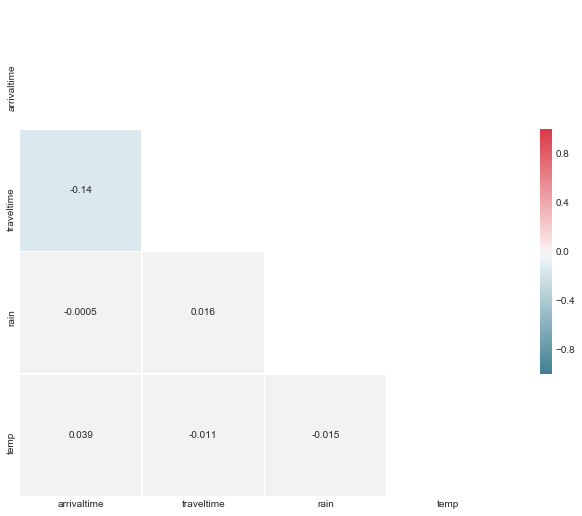

In [20]:
sns.set_style("white")
cont_corr = df.corr()
mask = np.zeros_like(cont_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cont_corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, xticklabels=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5})

### Linear Regression

In [21]:
import statsmodels.api as sm

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
# Converting Categorical into dummies
weekday_dummies = pd.get_dummies(df_X.dayofweek, prefix='dayofweek')
df_X_dummify = pd.concat([df_X,weekday_dummies],axis=1)

In [23]:
df_X_plots = df_X_dummify

In [24]:
from sklearn.model_selection import train_test_split
df_X_train_plots, df_X_test_plots, df_y_train_plots, df_y_test_plots = train_test_split(df_X_plots, df_y, test_size = 0.3, random_state = 100)

In [25]:
df_X_dummify.drop('dayofweek',axis=1,inplace=True)

In [26]:
df_X_dummify.head(1)

,arrivaltime,rain,temp,dayofweek_Friday,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
0,32380,0.0,13.1,0,0,0,0,1,0,0


In [27]:
df_X_dummify.std()

arrivaltime            15901.148036
rain                       0.534002
temp                       4.660570
dayofweek_Friday           0.362560
dayofweek_Monday           0.352412
dayofweek_Saturday         0.309431
dayofweek_Sunday           0.277493
dayofweek_Thursday         0.361571
dayofweek_Tuesday          0.385117
dayofweek_Wednesday        0.377488
dtype: float64

In [28]:
df_X_std = (df_X_dummify - df_X_dummify.mean()) / df_X_dummify.std()

In [29]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X_std, df_y, test_size = 0.3, random_state = 100)

In [82]:
X = sm.add_constant(df_X_train)
model = sm.OLS(df_y_train,X).fit()
print(model.params.tolist())

[111.22214458541936, -2.84320917782215, 0.6777077917620786, 0.08029247728135652, 0.34227767528439046, 1.3351402286630691, -2.2067174502964972, -2.0673942238585132, 1.0685513835622085, 0.5235917023185515, 0.1957615296998736]


In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             traveltime   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     22.91
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           1.77e-38
Time:                        20:29:45   Log-Likelihood:                -18266.
No. Observations:                4047   AIC:                         3.655e+04
Df Residuals:                    4037   BIC:                         3.662e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 111.2221    

In [32]:
X_train_predict = model.predict(X.head(100))

In [33]:
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_train.head(100),'Predicted_traveltime':X_train_predict})
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
4920,160.5,98.108740
5218,139.0,99.734920
3285,74.0,109.626423
181,141.0,116.290573
2347,78.0,109.522916
4284,71.0,111.974737
2248,120.0,109.931410
705,81.0,105.636970
1540,95.0,112.641947
5485,76.0,113.854963


In [34]:
from sklearn import metrics
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
# print("Accuracy: ", metrics.accuracy_score(y, predictions))
# print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
# print("Classification report:\n ", metrics.classification_report(y, predictions))

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  18.289028376133423
Mean Squared Error 516.7410524334441


### Support Vector Regression

In [36]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [37]:
# svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [38]:
# y_rbf = svr_rbf.fit(df_X_train,df_y_train).predict(df_X_train)
# y_lin = svr_lin.fit(df_X_train,df_y_train).predict(df_X_train)
# y_poly = svr_poly.fit(df_X_train,df_y_train).predict(df_X_train)

In [39]:
# lw = 2
# plt.scatter(df_X_train, df_y_train, color='darkorange', label='data')
# plt.plot(df_X_train, y_rbf, color='navy', lw=lw, label='RBF model')
# plt.plot(df_X_train, y_lin, color='c', lw=lw, label='Linear model')
# plt.plot(df_X_train, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
# plt.xlabel('data')
# plt.ylabel('target')
# plt.title('Support Vector Regression')
# plt.legend()
# plt.show()

In [40]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(df_X_train, df_y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
clf.score(df_X_train,df_y_train)

0.051100169669324624

In [42]:
X_test_Predict = clf.predict(df_X_test.dropna())

In [43]:
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_test,'Predicted_traveltime':X_test_Predict})

In [44]:
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
228,93.0,105.463988
4528,89.0,98.570937
423,90.0,95.561656
2643,88.0,110.716885
4126,92.0,114.167593
791,109.0,109.903867
5122,93.0,112.463593
2453,113.0,112.551639
1218,109.0,111.004486
3559,111.0,115.753310


In [45]:
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  17.404380285155998
Mean Squared Error 477.71722517747685


In [46]:
# Trying a different model
clf = SVR(kernel='linear',C=1.0, epsilon=0.2)
clf.fit(df_X_train, df_y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
clf.score(df_X_train,df_y_train)

0.03319557746552759

In [48]:
X_test_Predict = clf.predict(df_X_test)
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_test,'Predicted_traveltime':X_test_Predict})
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
228,93.0,105.559294
4528,89.0,103.202154
423,90.0,104.472566
2643,88.0,109.525055
4126,92.0,112.536116
791,109.0,108.811253
5122,93.0,113.708543
2453,113.0,114.722526
1218,109.0,109.646270
3559,111.0,113.102435


In [49]:
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  17.398962141986054
Mean Squared Error 478.89551479311257


In [50]:
# Trying a different model
clf = SVR(kernel='poly',C=1.0, epsilon=0.2)
clf.fit(df_X_train, df_y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
X_test_Predict = clf.predict(df_X_test)
X_train_mod_out = pd.DataFrame({'Actual_traveltime':df_y_test,'Predicted_traveltime':X_test_Predict})
X_train_mod_out

,Actual_traveltime,Predicted_traveltime
228,93.0,106.451347
4528,89.0,98.066607
423,90.0,93.431810
2643,88.0,109.714794
4126,92.0,112.183120
791,109.0,109.125576
5122,93.0,118.919464
2453,113.0,117.773355
1218,109.0,109.747518
3559,111.0,114.066363


In [52]:
y = X_train_mod_out.Actual_traveltime
predictions = X_train_mod_out.Predicted_traveltime
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  17.40721317832253
Mean Squared Error 477.15969140626885


### Random Forest

In [53]:

rfc.fit(df_X_train, df_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [ ]:
rfc._

In [54]:
rfc_imp = pd.DataFrame()
rfc_imp['Features']=df_X_train.columns
rfc_imp['Rel']=rfc.feature_importances_

In [55]:
rfc_imp.sort_values(by='Rel', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,Features,Rel
0,arrivaltime,0.522435
2,temp,0.301022
1,rain,0.041034
8,dayofweek_Tuesday,0.020722
3,dayofweek_Friday,0.020506
5,dayofweek_Saturday,0.020382
7,dayofweek_Thursday,0.019948
9,dayofweek_Wednesday,0.019399
4,dayofweek_Monday,0.017980
6,dayofweek_Sunday,0.016570


In [56]:
rfc_predictions = rfc.predict(df_X_train.head(100))
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': df_y_train.head(100), 'PredictedClass': rfc_predictions})
df_true_vs_rfc_predicted

,ActualClass,PredictedClass
4920,160.5,142.5671
5218,139.0,122.2382
3285,74.0,92.5747
181,141.0,131.7084
2347,78.0,88.2206
4284,71.0,86.6175
2248,120.0,115.0172
705,81.0,91.7966
1540,95.0,105.8598
5485,76.0,89.7650


In [57]:
from sklearn.metrics import accuracy_score
y = df_true_vs_rfc_predicted.ActualClass
predictions = df_true_vs_rfc_predicted.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  6.802688999999999
Mean Squared Error 72.45393456209999


> Random Forest has been the best predictors for now as compared to all the other Linear and SVR models

### ADA Boosting

In [58]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [60]:
regr_1 = DecisionTreeRegressor(max_depth=4)

In [61]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [62]:
regr_1.fit(df_X_train, df_y_train)
regr_2.fit(df_X_train, df_y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000001A00F25D1B0>)

In [63]:
y_1 = regr_1.predict(df_X_train)
y_2 = regr_2.predict(df_X_train)

In [64]:
# plt.figure()
# plt.scatter(df_X_train_plots['dayofweek'], df_y_train, c="k", label="training samples")
# plt.plot(df_X_train_plots['dayofweek'], y_1, c="g", label="n_estimators=1", linewidth=2)
# plt.plot(df_X_train_plots['dayofweek'], y_2, c="r", label="n_estimators=300", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Boosted Decision Tree Regression")
# plt.legend()
# plt.show()

In [65]:
decisiontreepred = pd.DataFrame({'ActualClass': df_y_train, 'PredictedClass': y_1})
adaboostpred = pd.DataFrame({'ActualClass': df_y_train, 'PredictedClass': y_2})

In [66]:
from sklearn.metrics import accuracy_score
y = decisiontreepred.ActualClass
predictions = decisiontreepred.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  17.497475739147966
Mean Squared Error 470.10259285512467


In [67]:
from sklearn.metrics import accuracy_score
y = adaboostpred.ActualClass
predictions = adaboostpred.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  18.632578198465517
Mean Squared Error 499.2452222896342


In [68]:
adaboostpred

,ActualClass,PredictedClass
4920,160.5,117.963325
5218,139.0,108.798810
3285,74.0,116.564729
181,141.0,119.129553
2347,78.0,112.026786
4284,71.0,112.518562
2248,120.0,117.279040
705,81.0,115.317791
1540,95.0,116.480935
5485,76.0,116.480935


## This is a time series analysis model ... Hence the y values have to be dependent on previoud y values and not just on X values

In [69]:
# Trying the moving exponential solution

In [70]:
ewma = pd.stats.moments.ewma

In [71]:
EMOV_n = ewma( df_y, com=2 )

C:\Users\harsh\Anaconda3\envs\COMP47350\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


In [72]:
len(EMOV_n)

5782

In [73]:
len(df_X)

5782

In [74]:
df_Xs = np.column_stack((df_X_std,EMOV_n))

In [75]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit ( df_X_std, df_y )
print(clf.coef_)

[-2.86209800e+00  5.44988176e-01 -5.92011498e-02  4.56229202e+14
  4.43459488e+14  3.89374747e+14  3.49184582e+14  4.54985227e+14
  4.84614350e+14  4.75013761e+14]


In [76]:
y_pred = clf.predict(df_X_std)

In [77]:
emov_pred = pd.DataFrame({'ActualClass': df_y, 'PredictedClass': y_pred})

In [78]:
emov_pred

,ActualClass,PredictedClass
0,91.0,116.810443
1,124.0,112.060443
2,152.0,114.560443
3,98.0,111.084893
4,76.0,115.185443
5,103.0,115.560443
6,96.0,108.060443
7,89.0,117.310443
8,86.0,111.185443
9,124.0,116.584893


In [79]:
y = emov_pred.ActualClass
predictions = emov_pred.PredictedClass
print("Mean Absolute Error: ",mean_absolute_error(y, predictions))
print("Mean Squared Error",mean_squared_error(y,predictions))

Mean Absolute Error:  17.77069859057505
Mean Squared Error 483.8580994731093
